<font color='#556b2f'> **Support Vector Machines with Synthetic Data**</font>

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [1]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(42)
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [4]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

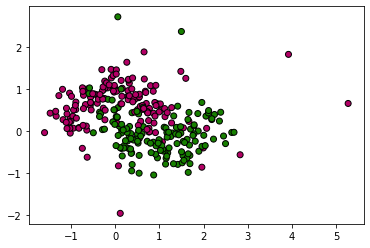

In [5]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
###   The effect of the regularization parameter, $C$


For each classifier, computing **both** the **training error** and the **validation error**. Plotting them together.

Best C:
1.0


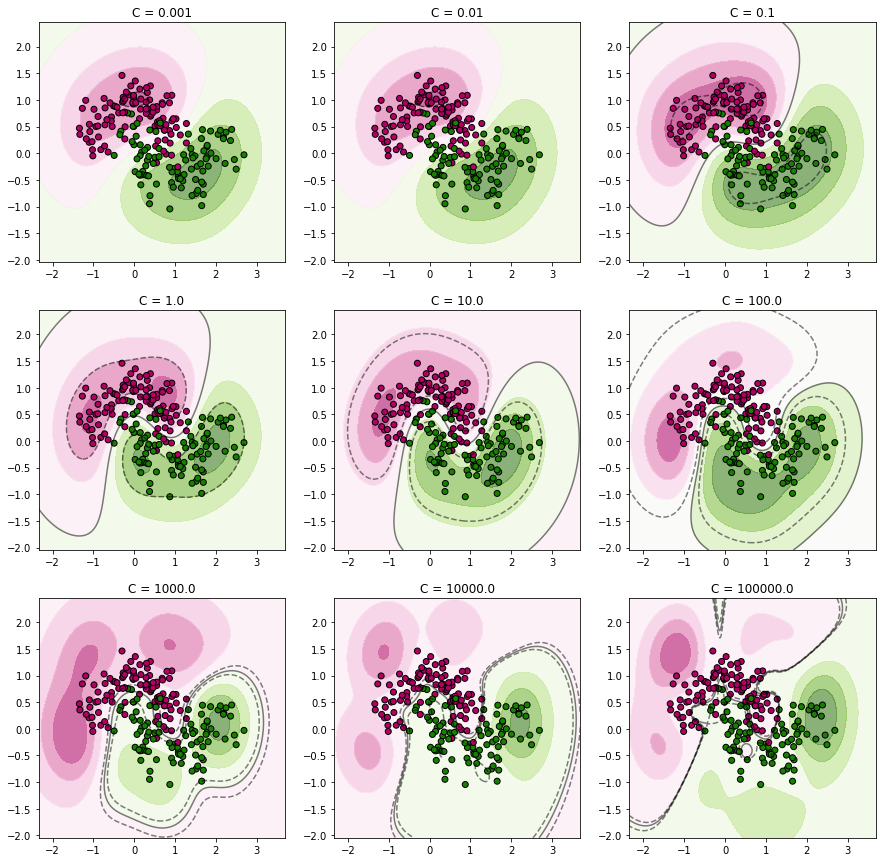

In [6]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
from sklearn.svm import SVC
import pandas as pd

C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()
models_Best = dict()

for C in C_values:
    clf = SVC(C=C,gamma=1, kernel='rbf')
    clf.fit(X_trn, y_trn)
    models.update({C : clf})
    models_Best.update({C : clf.score(X_val,y_val)})
    
visualize(models, 'C', X_trn, y_trn)

max = 0
for m in models_Best:
    if(models_Best[m]>max):
        max=models_Best[m]

for m in models_Best:
    if(models_Best[m]==max):
        print("Best C:")
        print(m)




---
###  The effect of the RBF kernel parameter, $\gamma$


Best G: 1.0
Accuracy of the best model is: 0.9166666666666666
Best G: 10.0
Accuracy of the best model is: 0.9166666666666666


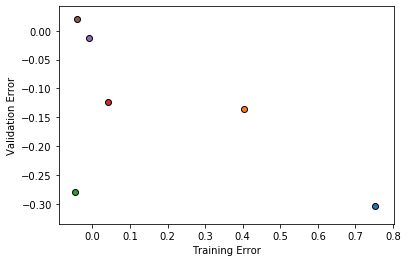

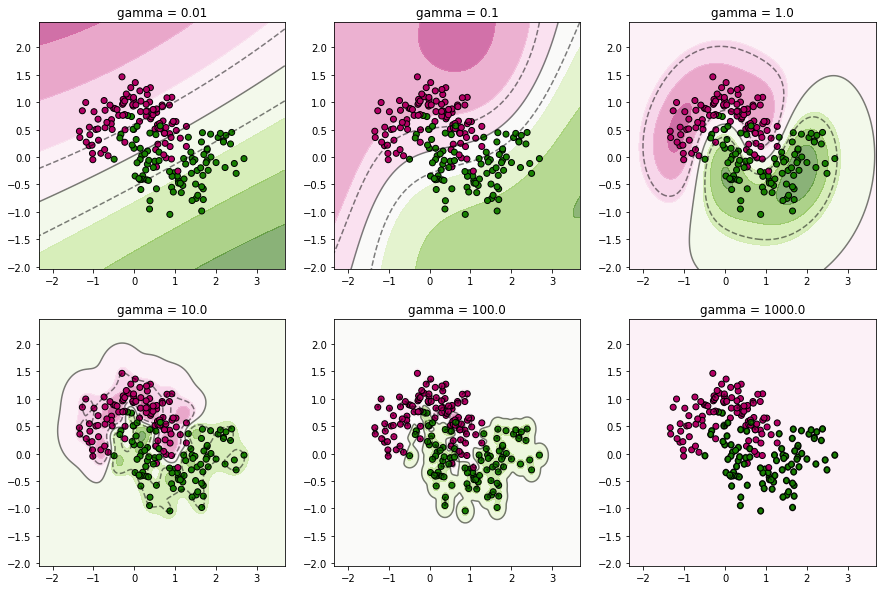

In [7]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models = dict()
trnErr = dict()
valErr = dict()
models_Best = dict()

for G in gamma_values:
    clf = SVC(C=10,gamma=G, kernel='rbf')
    clf.fit(X_trn, y_trn)
    models_Best.update({G : clf.score(X_val,y_val)})
    models.update({G : clf})
    trnErr.update({G : clf.intercept_})
    clf.fit(X_val, y_val)
    valErr.update({G : clf.intercept_})
    clf.fit(X_trn, y_trn)
    
for G in gamma_values:
    plt.scatter(trnErr[G], valErr[G],edgecolors='k')
    plt.xlabel('Training Error')
    plt.ylabel('Validation Error')
  
visualize(models, 'gamma', X_trn, y_trn)

max = 0
for m1 in models_Best:
    if(models_Best[m1]>max):
        max=models_Best[m1]

for m1 in models_Best:
    if(models_Best[m1]==max):
        print("Best G:",m1)
        print("Accuracy of the best model is:",models_Best[m1])
        


---
#  <font color='#556b2f'> **Breast Cancer Diagnosis with Support Vector Machines**</font>

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [10]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
#
data_trn = np.loadtxt('wdbc_trn.csv', dtype='float', delimiter=',', usecols=range(1,30), unpack=False)
data_val = np.loadtxt('wdbc_val.csv', dtype='float', delimiter=',', usecols=range(1,30), unpack=False)
data_tst = np.loadtxt('wdbc_tst.csv', dtype='float', delimiter=',', usecols=range(1,30), unpack=False)

label_trn = np.loadtxt('wdbc_trn.csv', dtype='int', delimiter=',', usecols=(0), unpack=False)
label_val = np.loadtxt('wdbc_val.csv', dtype='int', delimiter=',', usecols=(0), unpack=False)
label_tst = np.loadtxt('wdbc_tst.csv', dtype='int', delimiter=',', usecols=(0), unpack=False)

$C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Printing the tables corresponding to the training and validation errors.


In [11]:
gamma_values = (0.001,0.01,0.1,1,10,100,100)
C_values = (0.01,0.1,1,10,100,1000,10000)
for G in gamma_values:
    for C in C_values:
        clf = SVC(C=10,gamma=G, kernel='rbf')
        
        clf.fit(X_trn, y_trn)
        print("Value of C is :",C)
        print("Value of Gamma is:",G)
        print("Value of Training Error is:",clf.intercept_)
        
        #Now calculating the validation error
        clf.fit(X_val, y_val)
        print("Value of Validation Error is:",clf.intercept_)
        print("----------------------------------------")
        
    

Value of C is : 0.01
Value of Gamma is: 0.001
Value of Training Error is: [0.11776798]
Value of Validation Error is: [0.02898878]
----------------------------------------
Value of C is : 0.1
Value of Gamma is: 0.001
Value of Training Error is: [0.11776798]
Value of Validation Error is: [0.02898878]
----------------------------------------
Value of C is : 1
Value of Gamma is: 0.001
Value of Training Error is: [0.11776798]
Value of Validation Error is: [0.02898878]
----------------------------------------
Value of C is : 10
Value of Gamma is: 0.001
Value of Training Error is: [0.11776798]
Value of Validation Error is: [0.02898878]
----------------------------------------
Value of C is : 100
Value of Gamma is: 0.001
Value of Training Error is: [0.11776798]
Value of Validation Error is: [0.02898878]
----------------------------------------
Value of C is : 1000
Value of Gamma is: 0.001
Value of Training Error is: [0.11776798]
Value of Validation Error is: [0.02898878]
----------------------

---
# <font color='#556b2f'> **Breast Cancer Diagnosis with $k$-Nearest Neighbors**</font>

Best k: 11
Accuracy of the best model is: 0.9557522123893806


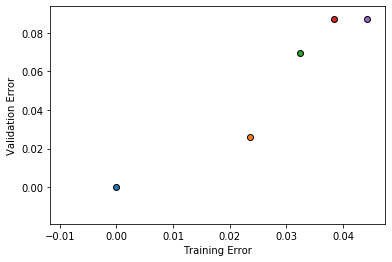

In [12]:
from sklearn.neighbors import KNeighborsClassifier as kn
models = dict()
trnErr = dict()
valErr = dict()
k_values = {1,5,11,15,21}
models_Best = dict()

for k in k_values:
    KNN = kn(n_neighbors=k)
    KNN.fit(data_trn, label_trn)
    models.update({k : KNN})
    
    trnErr.update({k : (1-KNN.score(data_trn,label_trn))})
    KNN.fit(data_val,label_val)
    valErr.update({k : 1-KNN.score(data_val,label_val)})
    models_Best.update({k : KNN.score(data_trn,label_trn)})
    
for k in k_values:
    plt.scatter(trnErr[k], valErr[k],edgecolors='k')
    plt.xlabel('Training Error')
    plt.ylabel('Validation Error')
    
max = 0
for m1 in models_Best:
    if(models_Best[m1]>max):
        max=models_Best[m1]

for m1 in models_Best:
    if(models_Best[m1]==max):
        print("Best k:",m1)
        print("Accuracy of the best model is:",models_Best[m1])

# Simply by looking at the accuracy I would choose KNN for this "SPECIFIC" data set. SVM can very easily be a better
# model with for different data set. SVM accuray = 91%     KNN accuracy = 96%